# EXIT_TEST

### import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### read the dataset

In [3]:
data=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\train_exit.csv")
pd.set_option('display.max_columns',None)
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,NaN,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,79.0,78.0,21.2,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,35.0,56.0,23.4,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,48.0,66.0,18.9,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,34.0,60.0,24.9,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,49.0,72.0,28.5,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,57.0,49.0,25.5,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


***the dataset contains 30 features and 13994 entries***

# Exploratory Data Analysis

## check for basic information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

***Dataset has 30 features and 13994  entries. Among that, 21 features are numerical (19 float64 and 2 int64) and 9 are categorical features.***

### Check statistical summary

In [5]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,13994.000000,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,28.536730,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,9.735249,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,2.000000,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,25.000000,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,31.000000,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,35.000000,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,50.000000,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


### Check for unique values

In [6]:
(data.nunique()).sort_values(ascending=False)

player_id                    13994
name                         13994
max_running_speed              166
country                        163
ball_controlling_skills         89
weight                          88
body_balance                    86
penalties_conversion_rate       86
fitness_rating                  85
body_reflexes                   84
mental_strength                 83
shot_accuracy                   79
defending_skills                78
passing_skills                  77
jumping_skills                  74
body_strength_stamina           73
goalkeeping_skills              65
behaviour_rating                64
dribbling_skills                48
age                             39
height                          31
years_of_experience             25
matches_played                  18
no_of_disqualifications         17
trophies_won                    10
coaching                         4
strong_foot                      3
dedication_level                 3
gender              

***Feature 'player_id' and 'name'  has full of unique values.***

### Check for duplicates

In [7]:
data.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

### Check for null values 

In [8]:
data.isnull().sum().sort_values(ascending=False)

strong_foot                  1833
behaviour_rating              703
fitness_rating                695
matches_played                666
shot_accuracy                 572
weight                        417
ball_controlling_skills       413
years_of_experience           144
coaching                      125
penalties_conversion_rate      30
mental_strength                28
jumping_skills                 24
gender                         19
player_id                       0
max_running_speed               0
dedication_level                0
no_of_disqualifications         0
trophies_won                    0
passing_skills                  0
body_strength_stamina           0
dribbling_skills                0
name                            0
defending_skills                0
goalkeeping_skills              0
body_balance                    0
body_reflexes                   0
height                          0
country                         0
age                             0
selection     

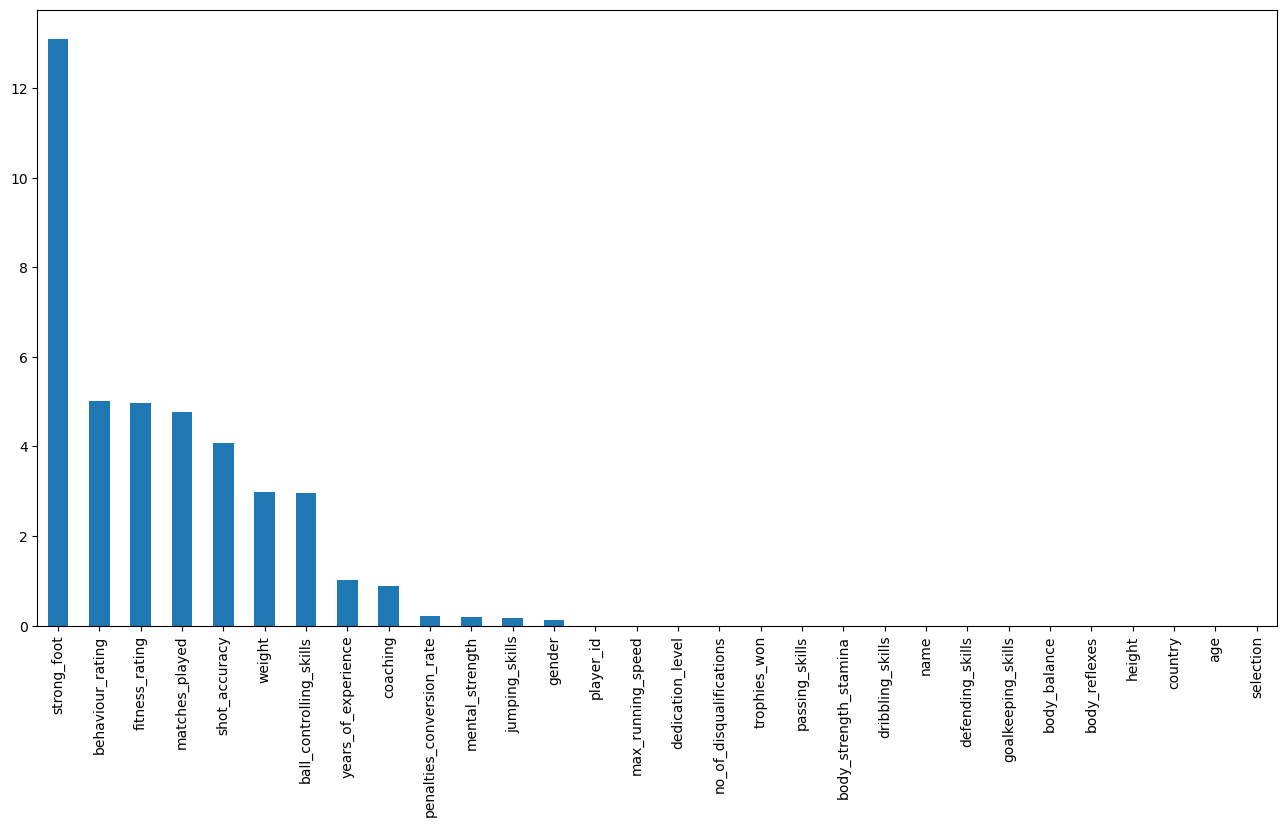

In [9]:
plt.figure(figsize=(16, 8))
(((data.isnull().sum()/len(data))*100).sort_values(ascending=False)).plot(kind='bar')
plt.show()

***13 features out of 30 have null values.***

### Check for outliers

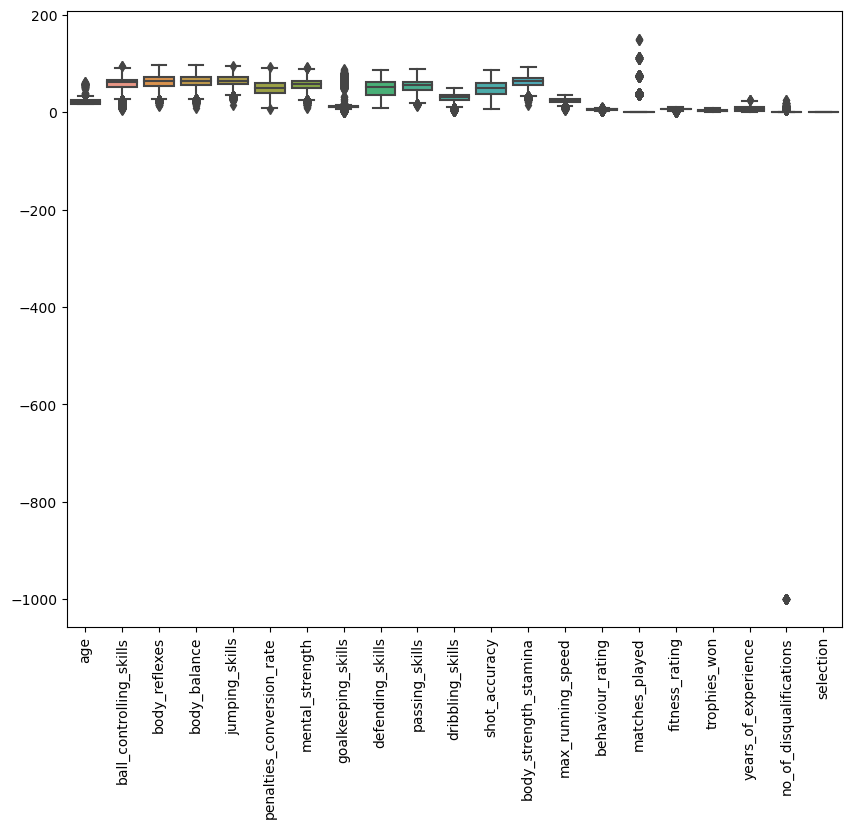

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

***Outliers are preseent in almost every  features except defending skillsand shot_accuracy.***

### Distribution of features

Add percentages on top of bars

In [11]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)

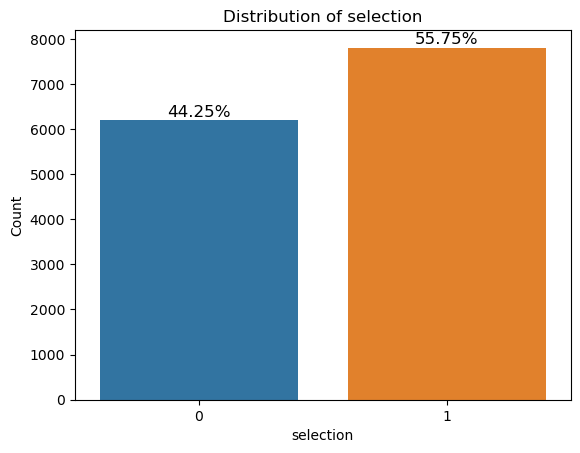

In [12]:
ax=sns.countplot(x='selection',data=data)
plt.title('Distribution of selection')
plt.xlabel('selection')
plt.ylabel('Count')
percentage_without_hue(ax, data['selection'], 0,80,12)
plt.show()

***Inference : Target variable 'selection' is not imbalanced. lets say 44% players are not selected and 55% players are selected.***

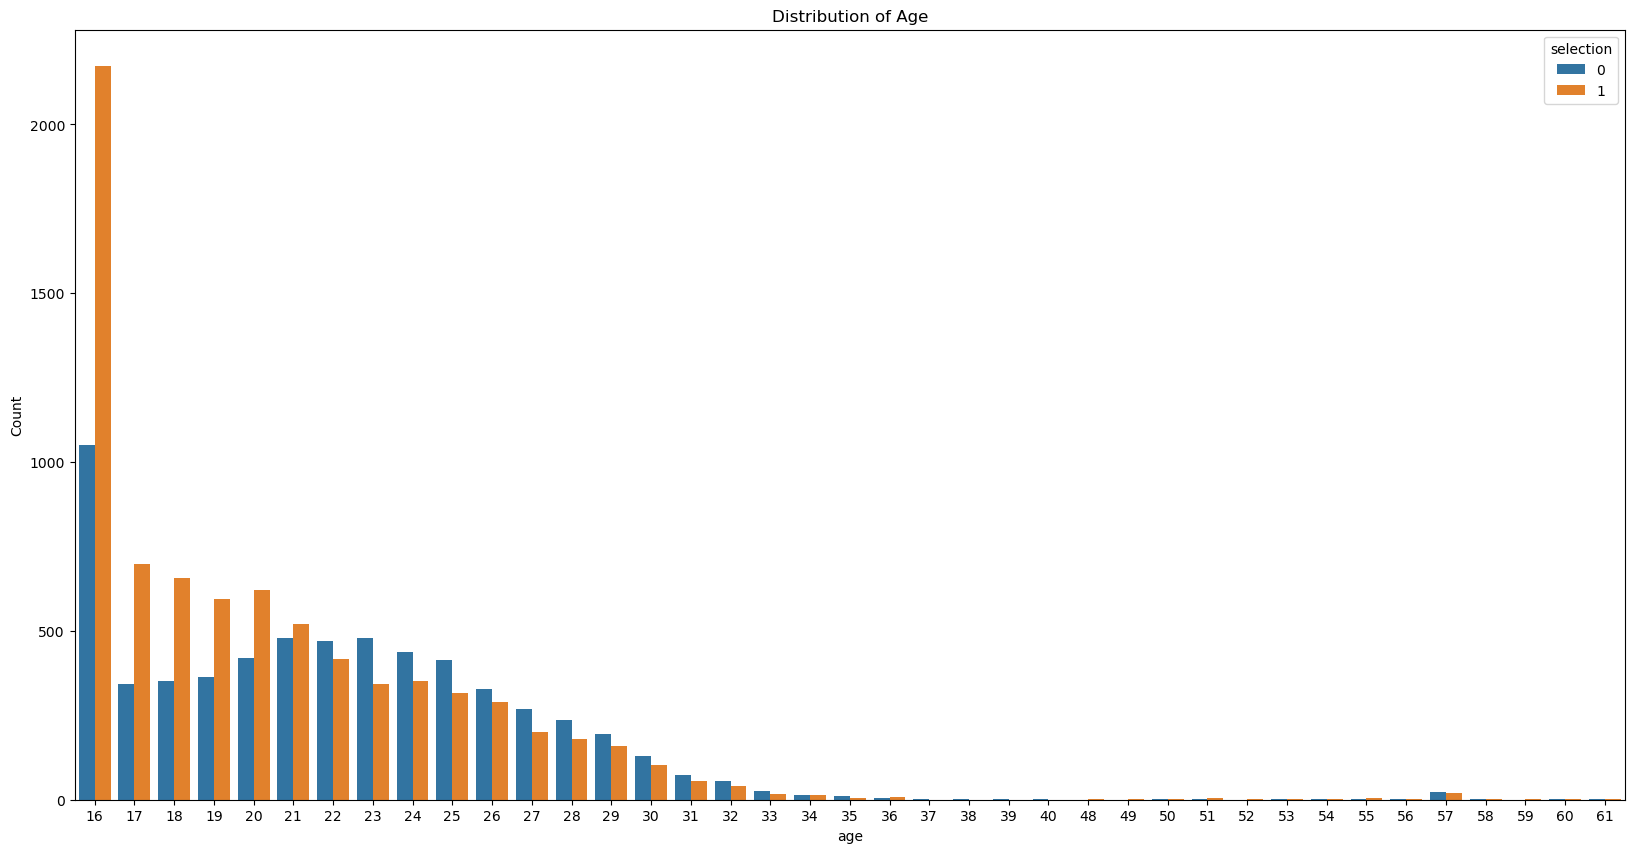

In [13]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='age',data=data,hue='selection')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

***Inference : 'Age' feature is not uniformly distributed,it is right skewed.***

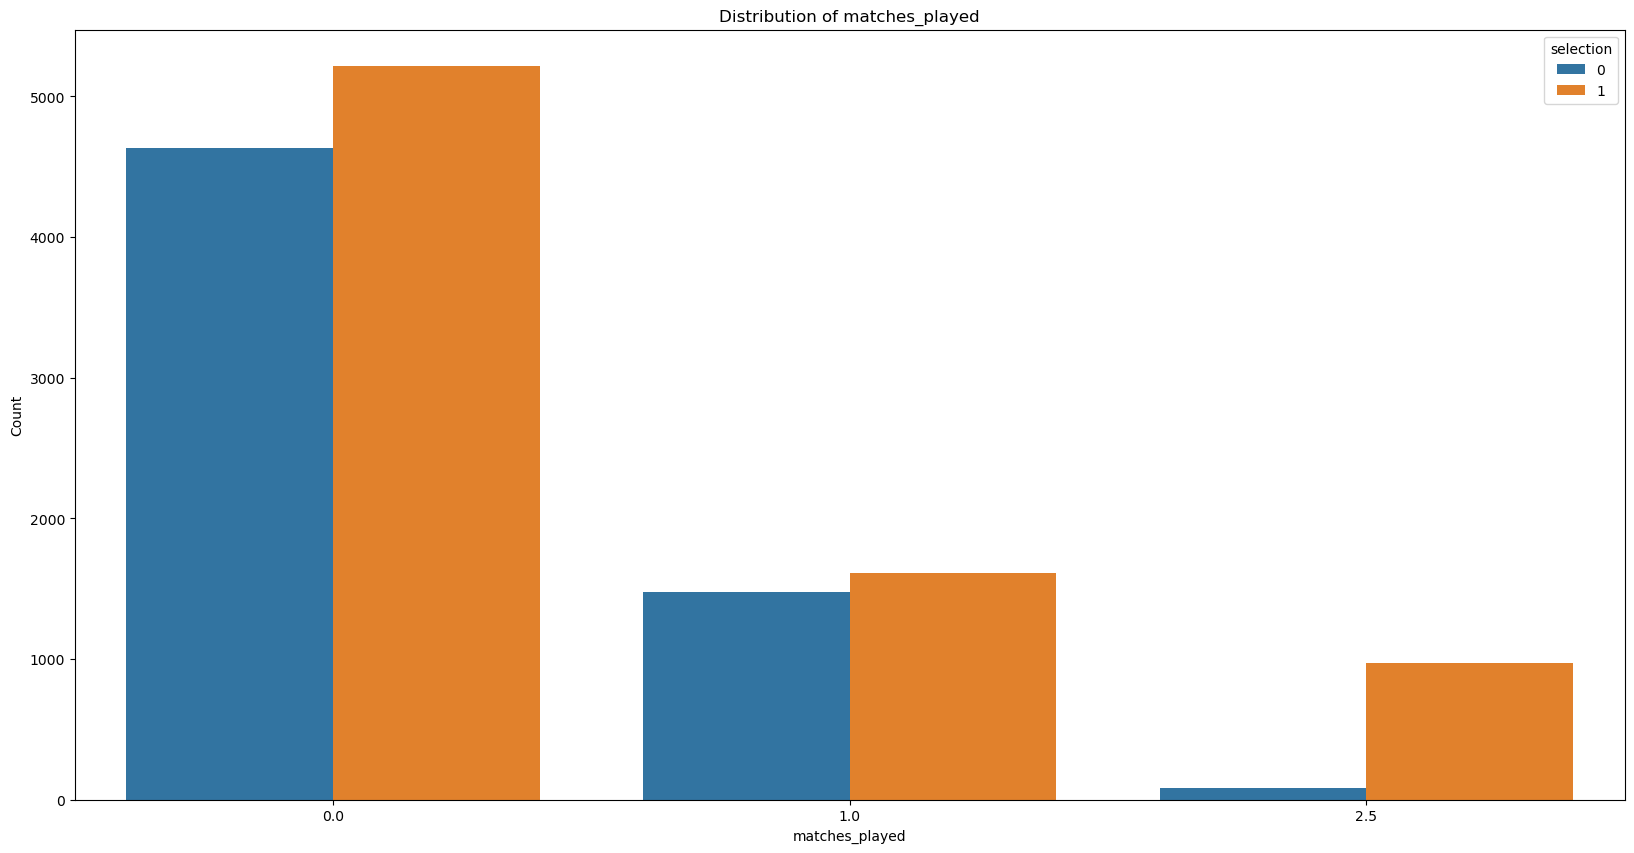

In [76]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='matches_played',data=data,hue='selection')
plt.title('Distribution of matches_played')
plt.xlabel('matches_played')
plt.ylabel('Count')
plt.show()

***Inference : 'matches_played' feature is not uniformly distributed.***

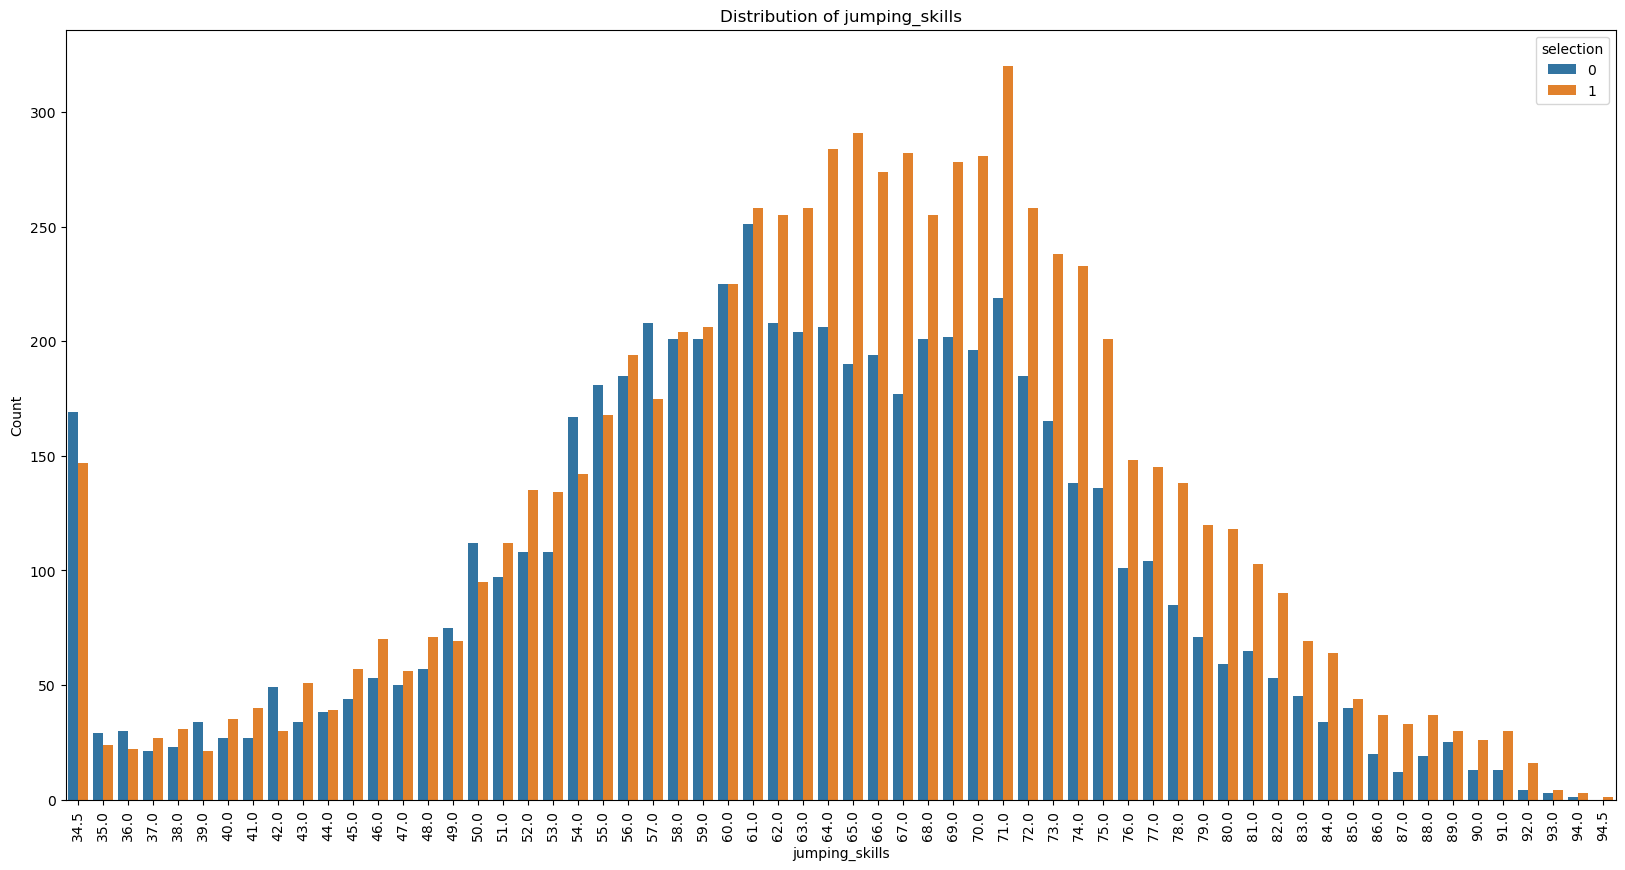

In [91]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='jumping_skills',data=data,hue='selection')
plt.title('Distribution of jumping_skills')
plt.xlabel('jumping_skills')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

***Inference : 'jumping_skills' feature is mostly uniformly distributed.***

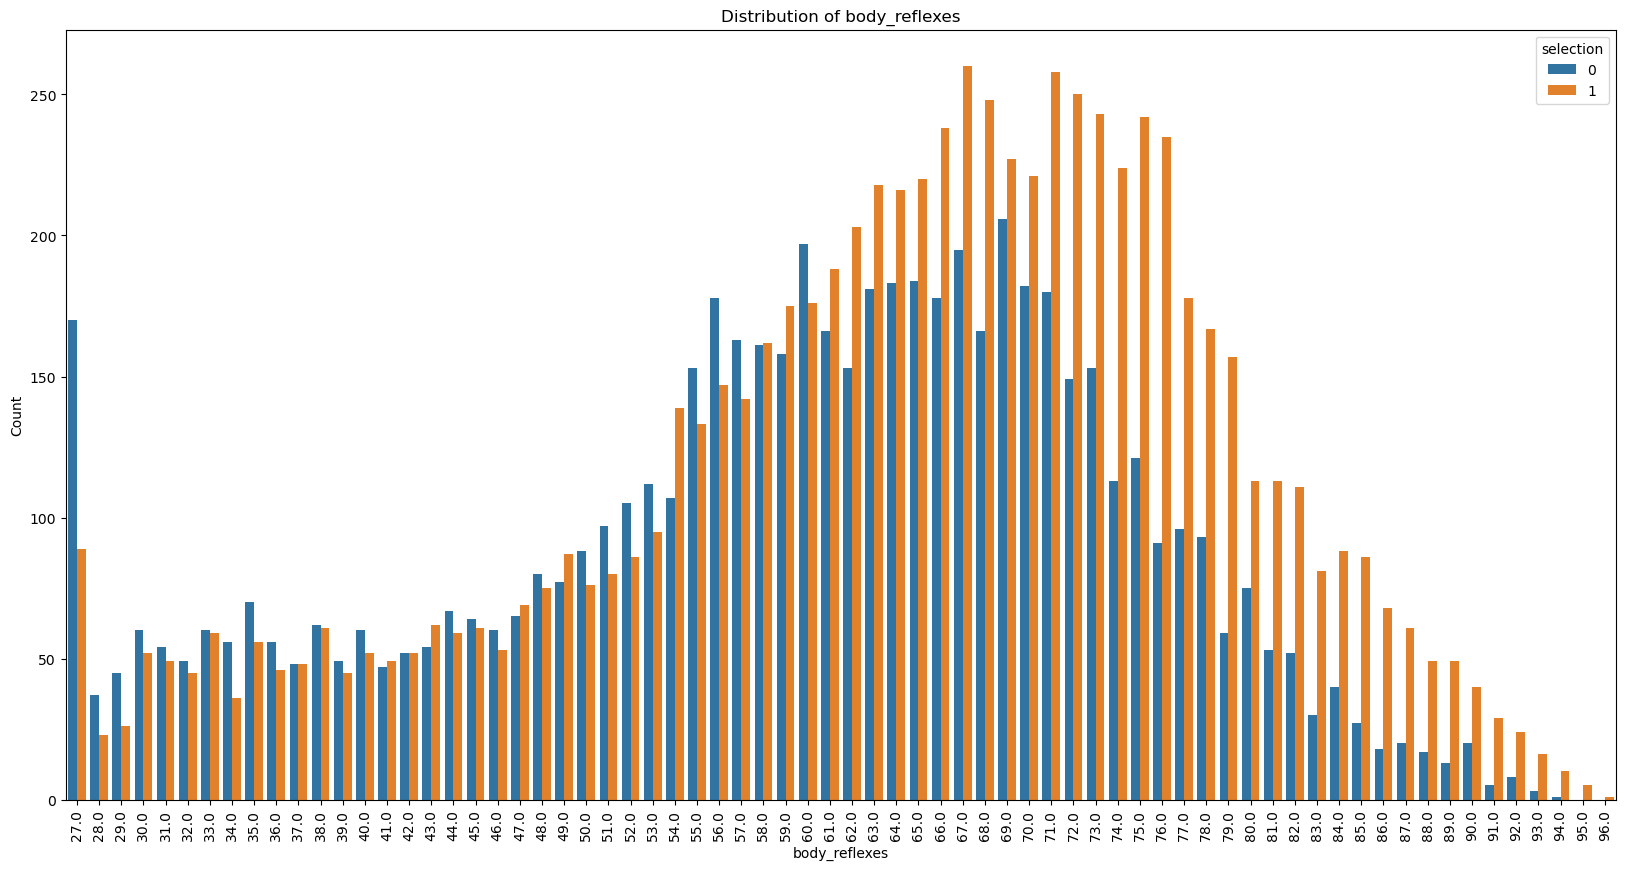

In [90]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='body_reflexes',data=data,hue='selection')
plt.title('Distribution of body_reflexes')
plt.xlabel('body_reflexes')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

***Inference : 'body_reflexes' feature is mostly uniformly distributed.***

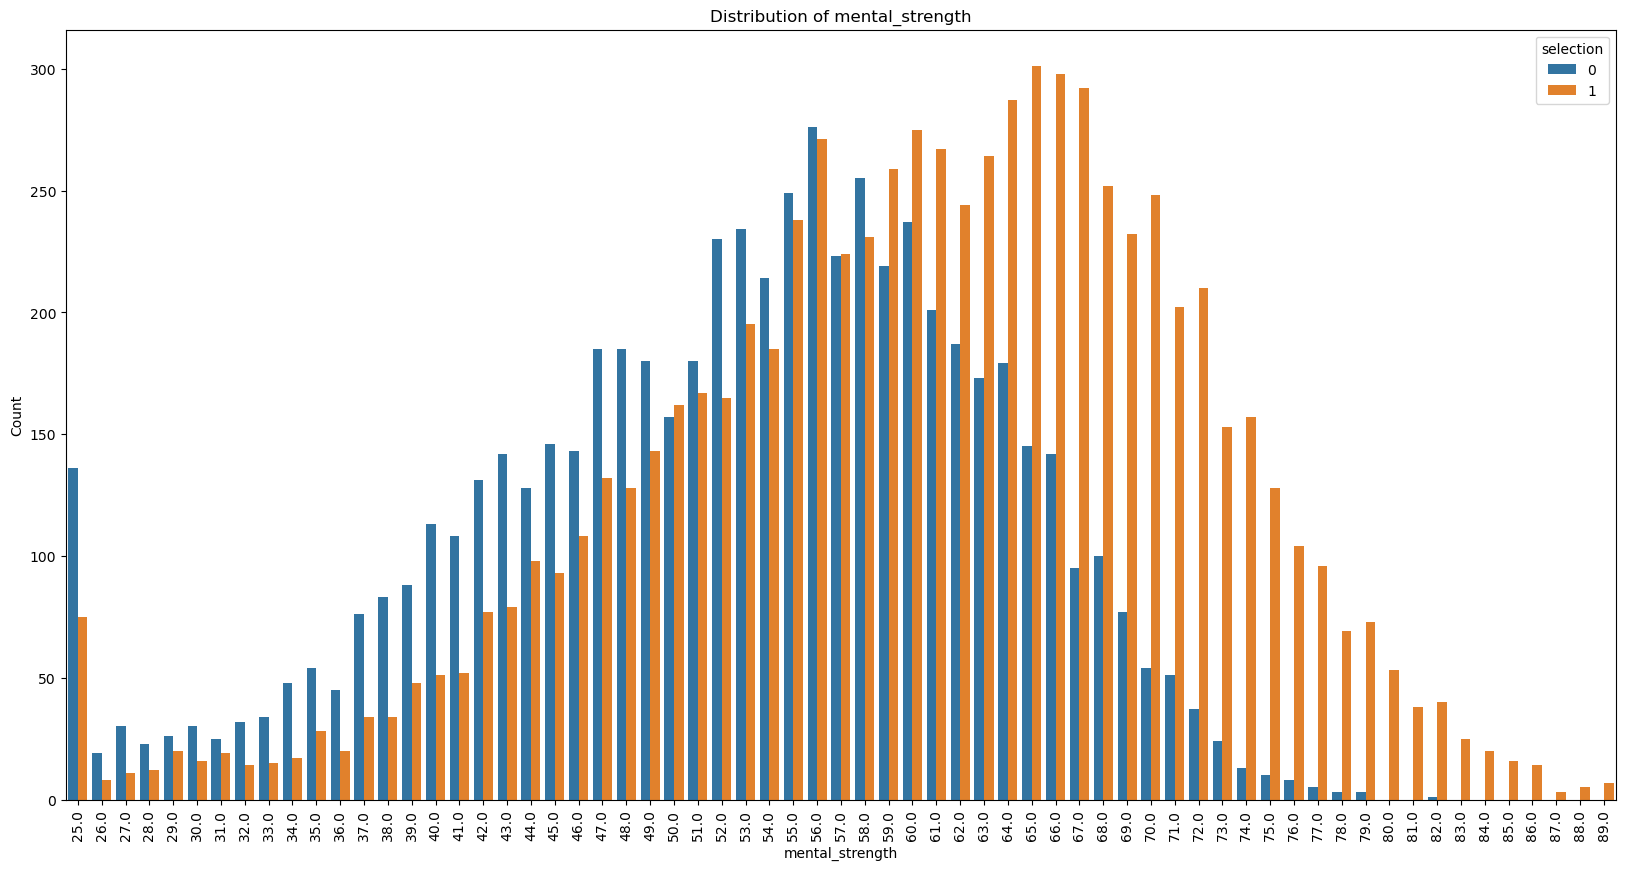

In [89]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='mental_strength',data=data,hue='selection')
plt.title('Distribution of mental_strength')
plt.xlabel('mental_strength')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

***Inference : 'mental_strength' feature is mostly uniformly distributed.***

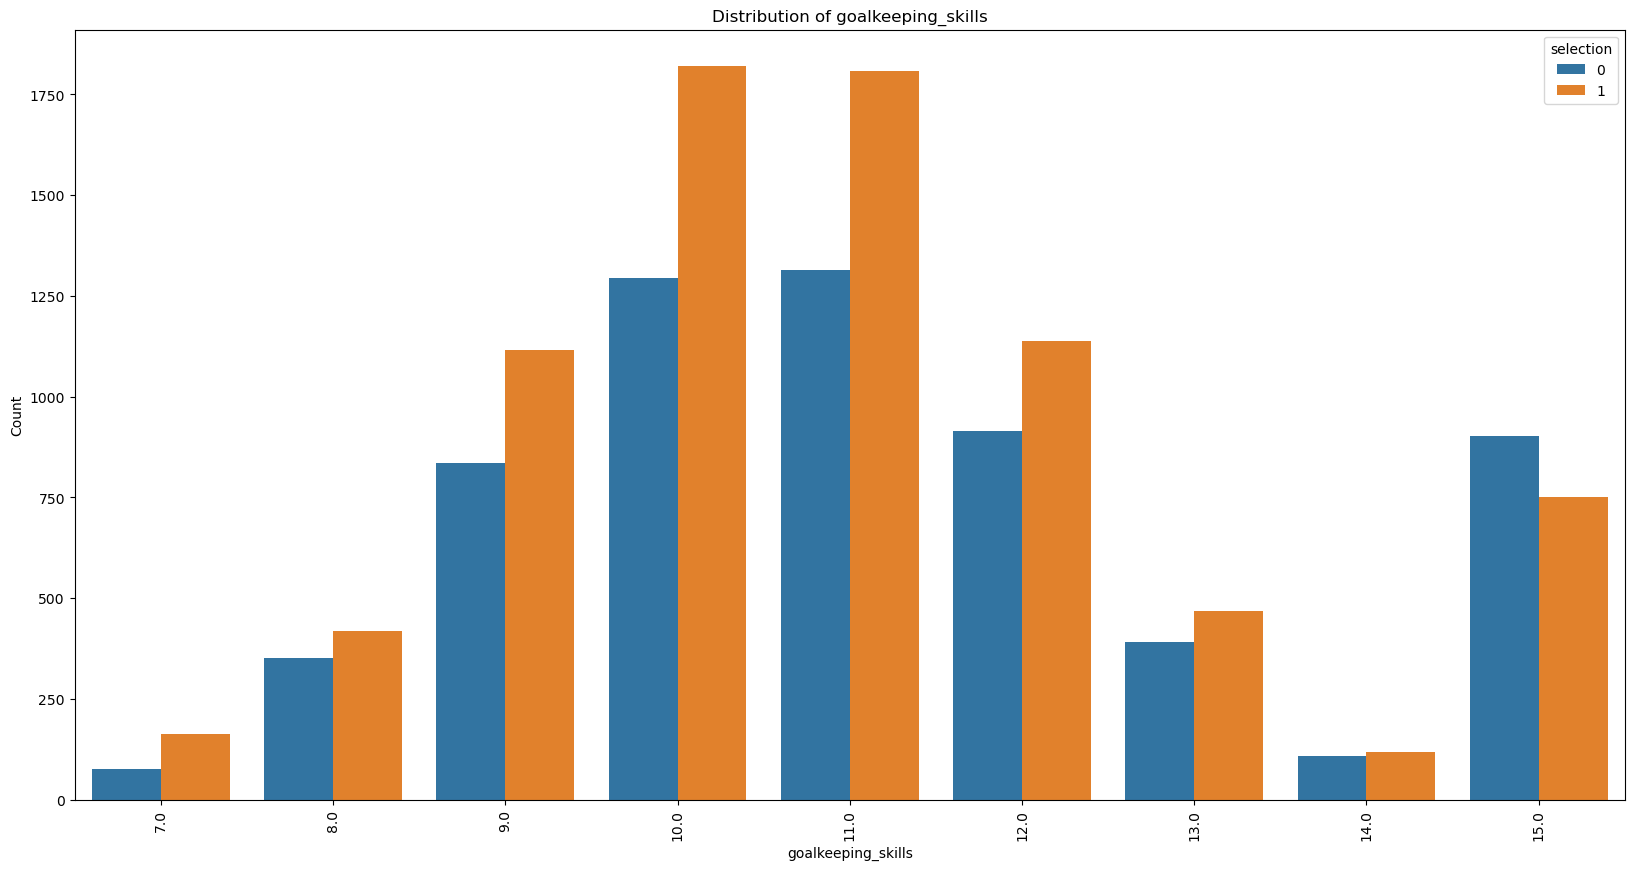

In [87]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='goalkeeping_skills',data=data,hue='selection')
plt.title('Distribution of goalkeeping_skills')
plt.xlabel('goalkeeping_skills')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

***Inference : 'goalkeeping_skills' feature is mostly uniformly distributed.***

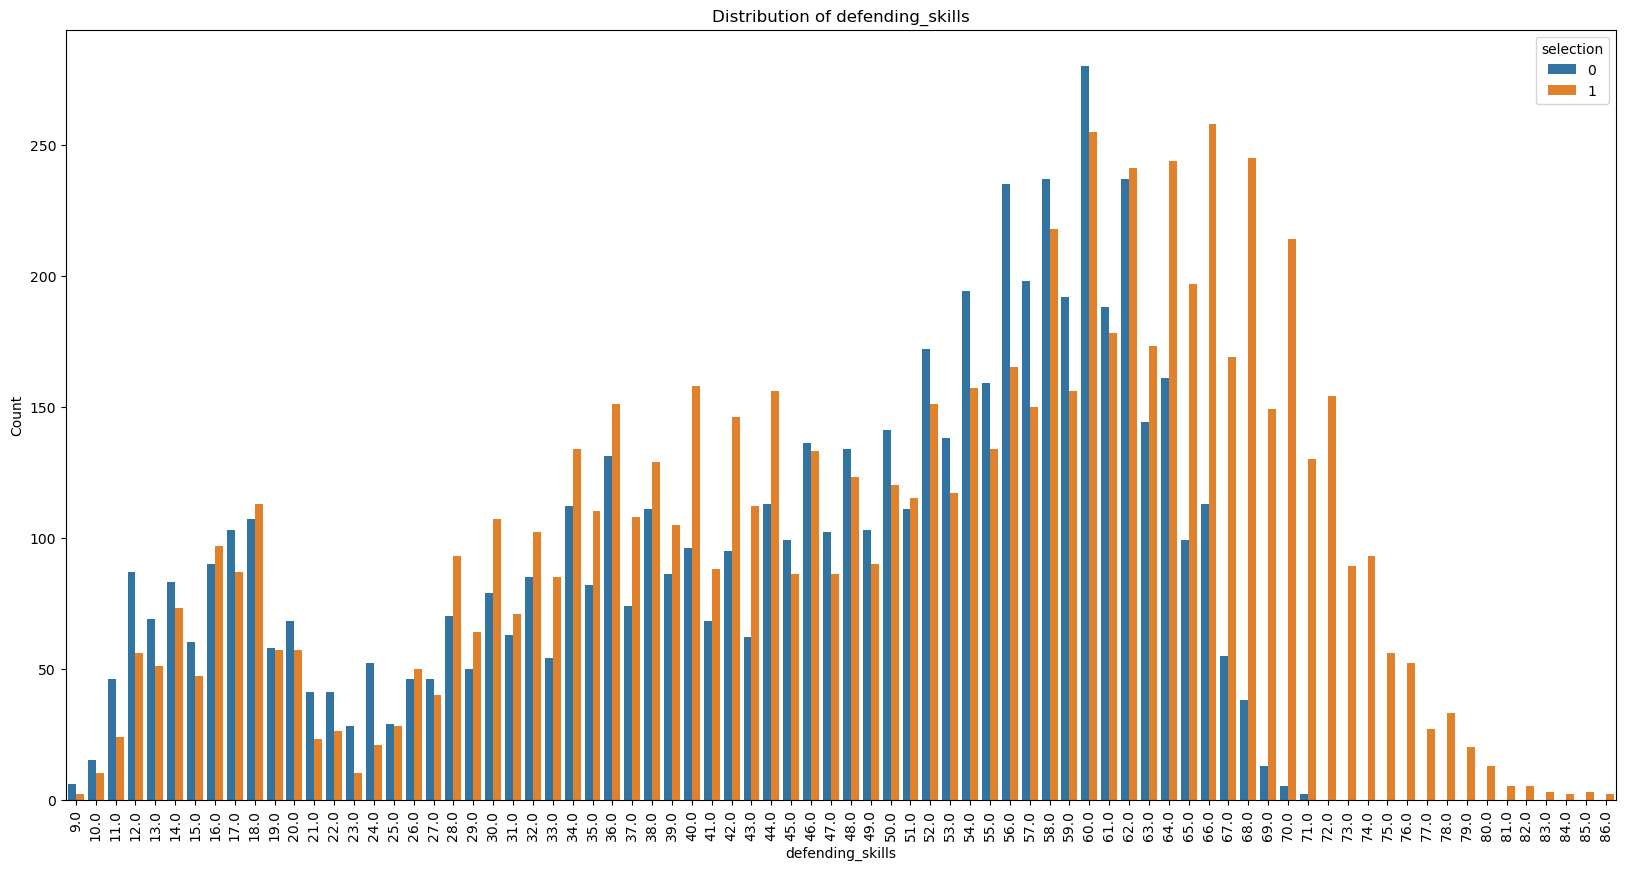

In [88]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='defending_skills',data=data,hue='selection')
plt.title('Distribution of defending_skills')
plt.xlabel('defending_skills')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

***Inference : 'defending_skills' feature is mostly left skewed .***

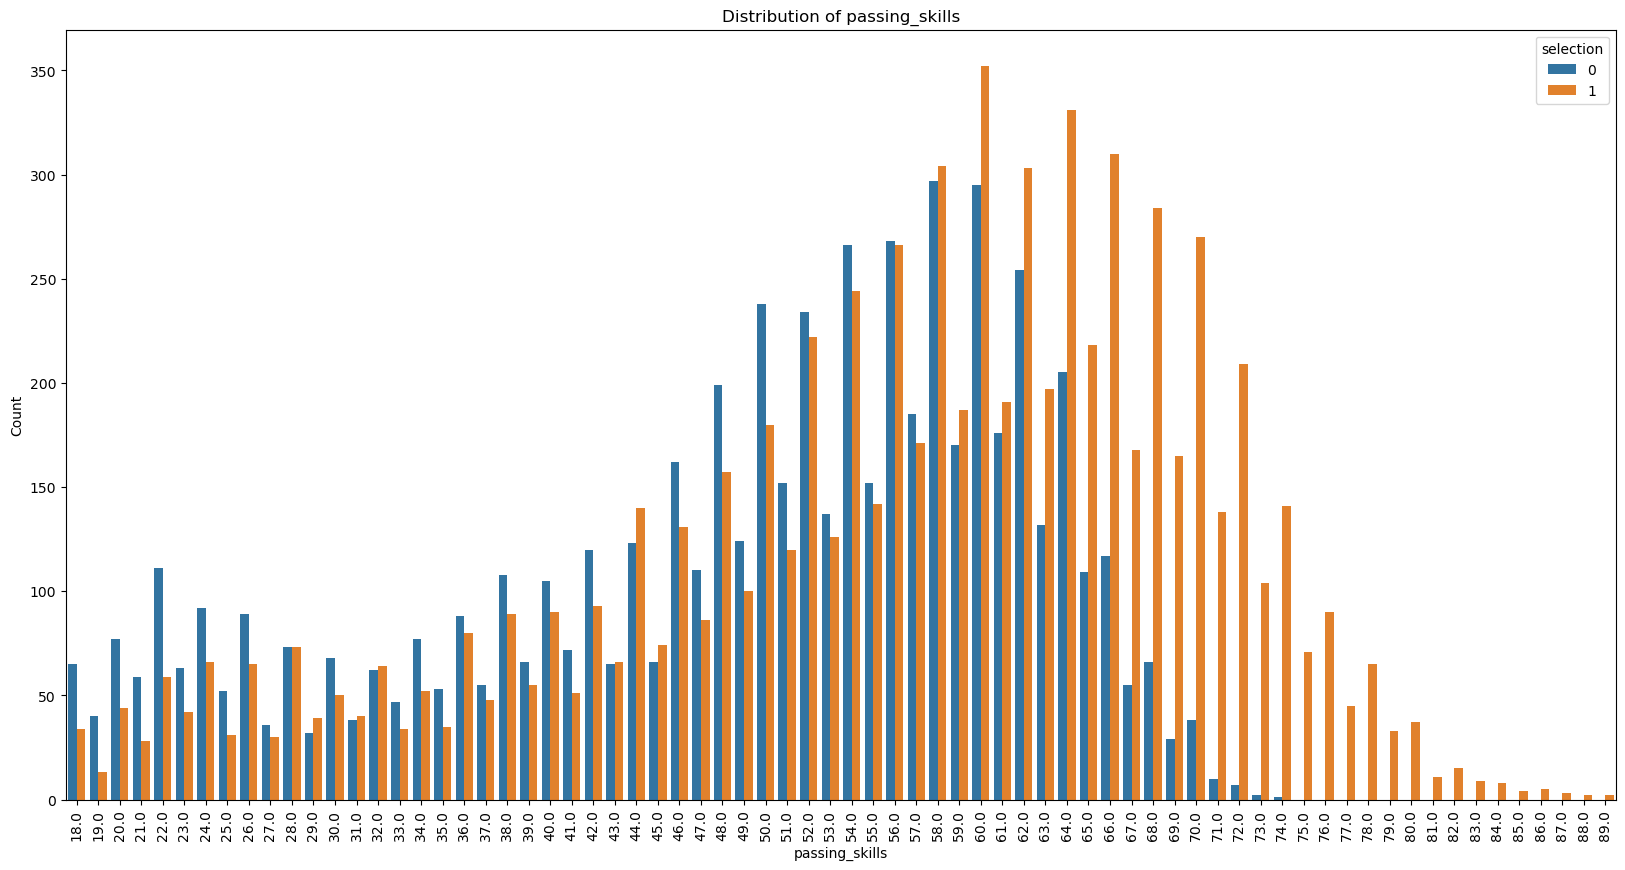

In [95]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='passing_skills',data=data,hue='selection')
plt.title('Distribution of passing_skills')
plt.xlabel('passing_skills')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

 ***Inference : 'passing_skills' feature is not uniformly distributed .***

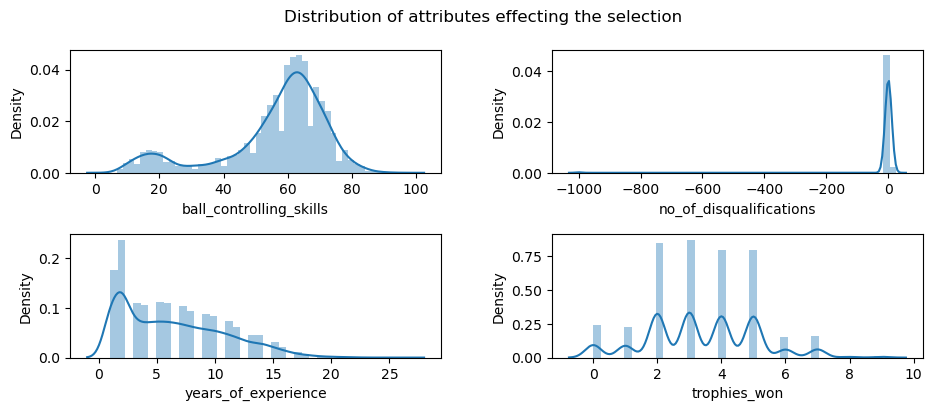

In [15]:
fig,axes = plt.subplots(2, 2, figsize=(11, 4))
plt.suptitle('Distribution of attributes effecting the selection')
sns.distplot(data["ball_controlling_skills"], ax=axes[0,0])
sns.distplot(data["no_of_disqualifications"], ax=axes[0,1])
sns.distplot(data["years_of_experience"], ax=axes[1,0])
sns.distplot(data["trophies_won"], ax=axes[1,1])
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference:here 'ball_controlling_skills'and 'trophies_won'is normally distriduted , 'years_of_experience'are left skewed and  'no_of_disqualifications'are right skewed. .***

## Correlation

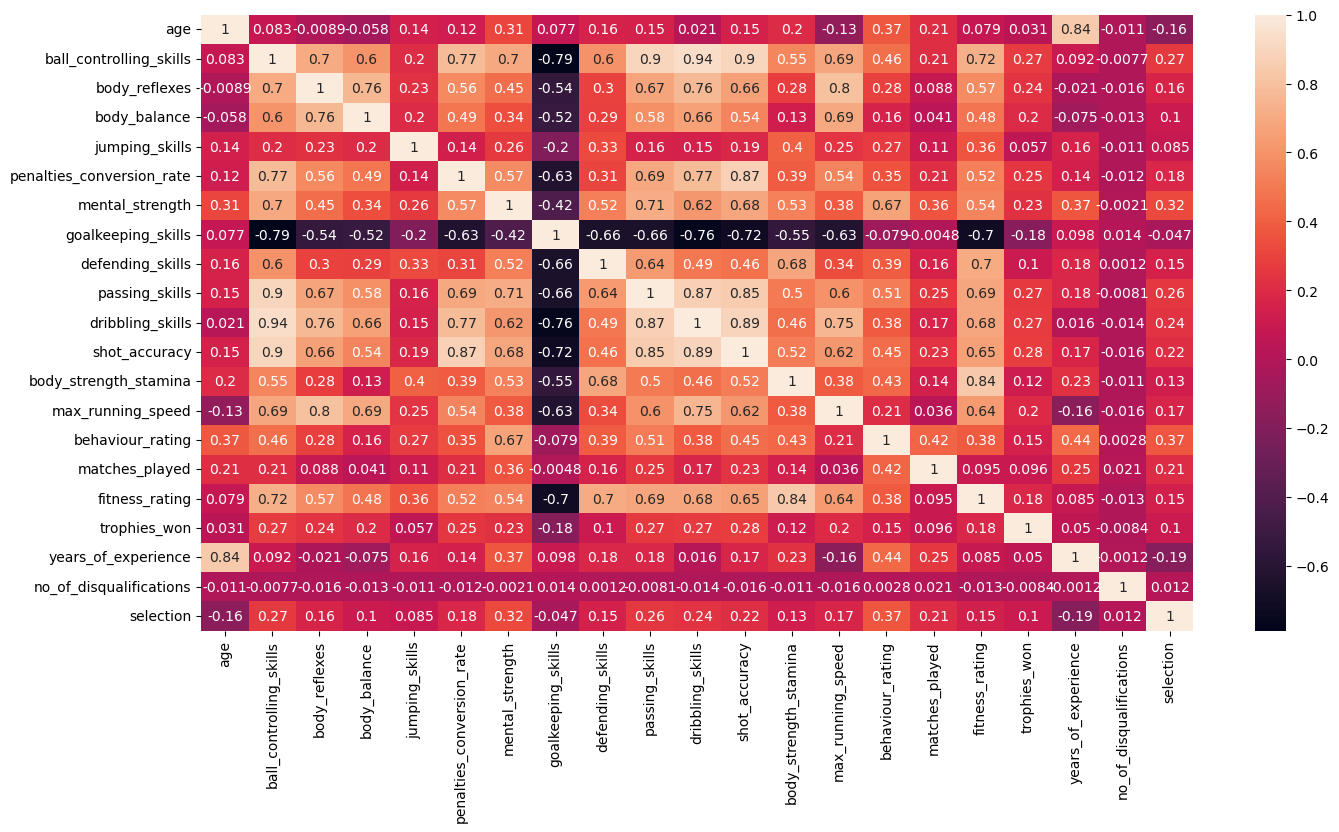

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)
plt.show()

***infrence : here 'dribbling_skills'and 'ball_controlling_skills',has correlation near to 1 (0.94) .***

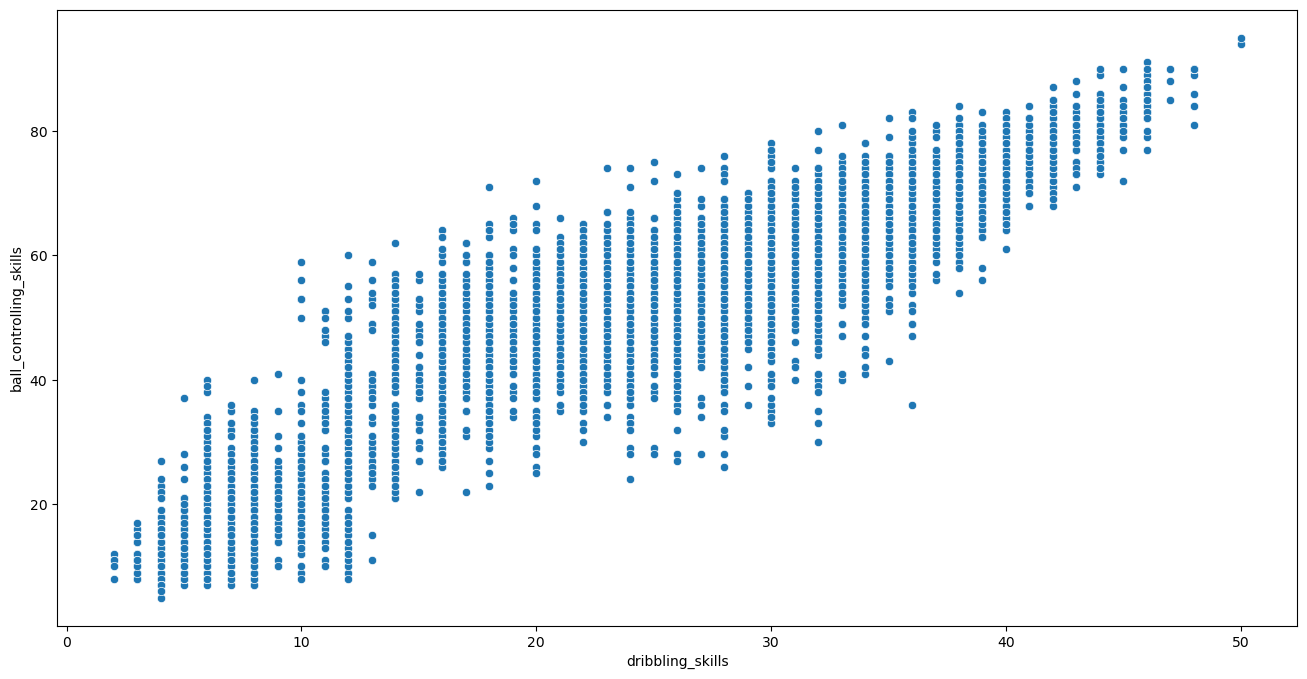

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='dribbling_skills',y='ball_controlling_skills',data=data)
plt.show()

# Data Pre - Processing

drop unnecessary coloumns

In [18]:
data.drop(['player_id','name','strong_foot','trophies_won','behaviour_rating','coaching'],axis=1,inplace=True)

### Check for null values

In [19]:
data.isnull().sum().sort_values(ascending=False)

fitness_rating               695
matches_played               666
shot_accuracy                572
weight                       417
ball_controlling_skills      413
years_of_experience          144
penalties_conversion_rate     30
mental_strength               28
jumping_skills                24
gender                        19
age                            0
no_of_disqualifications        0
dedication_level               0
max_running_speed              0
body_strength_stamina          0
defending_skills               0
dribbling_skills               0
passing_skills                 0
goalkeeping_skills             0
body_balance                   0
body_reflexes                  0
height                         0
country                        0
selection                      0
dtype: int64

***All the 9 are features with missing values . Also 2 among them are categorical features. So use corresponding mode for null value imputation. For the remaining 7 numerical features also we can use mode for null value imputation.***

In [26]:
null_value_columns=['matches_played','shot_accuracy','ball_controlling_skills','years_of_experience','penalties_conversion_rate','mental_strength','jumping_skills','gender','weight','fitness_rating']
for item in null_value_columns:
    data[item]=data[item].fillna(value=data[item].mode()[0])

### Check again for null values

In [28]:
data.isnull().sum().sort_values(ascending=False)

age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
matches_played               0
fitness_rating               0
dedication_level             0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

***All null values are imputed properly.***

## Label Encoding

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  int32  
 2   country                    13994 non-null  int32  
 3   height                     13994 non-null  int32  
 4   weight                     13994 non-null  int32  
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

In [30]:
categorical_columns=['gender','country','height','weight','dedication_level']      
le=LabelEncoder()
for i in categorical_columns:
    data[i]=le.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  int64  
 2   country                    13994 non-null  int64  
 3   height                     13994 non-null  int64  
 4   weight                     13994 non-null  int64  
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

### Outlier Treatment

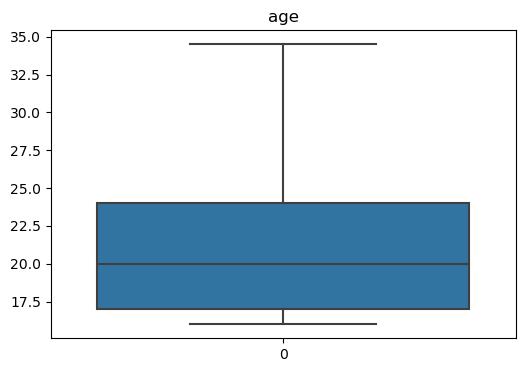

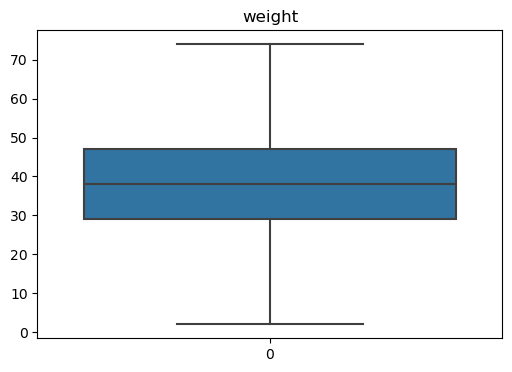

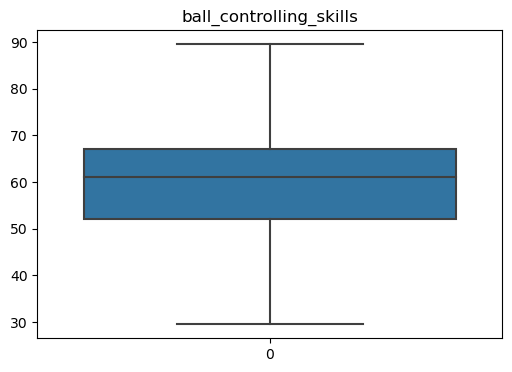

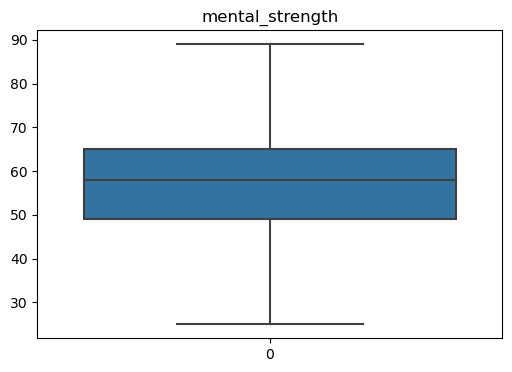

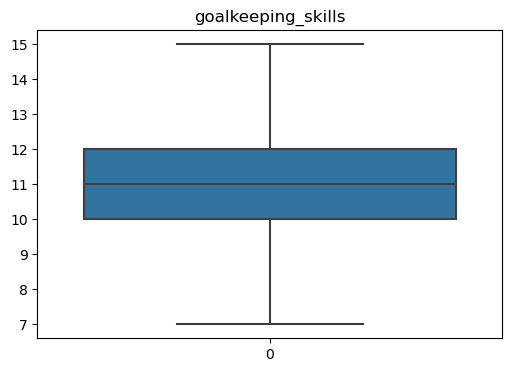

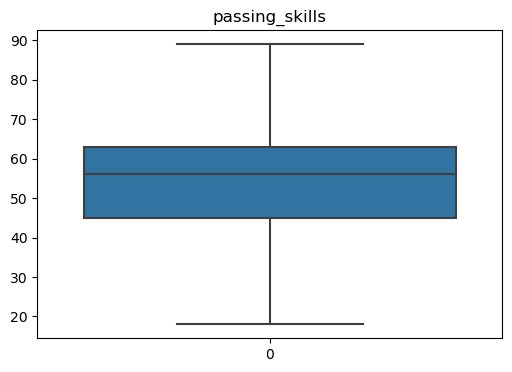

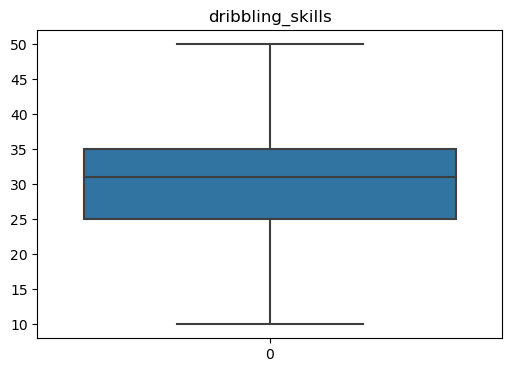

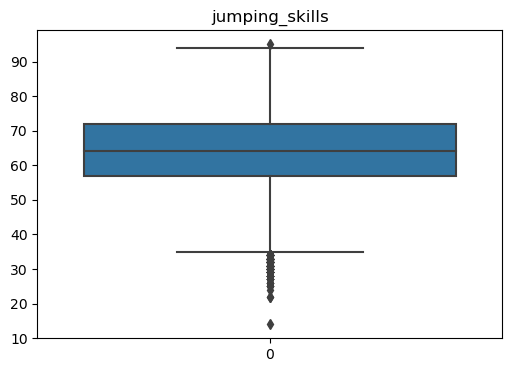

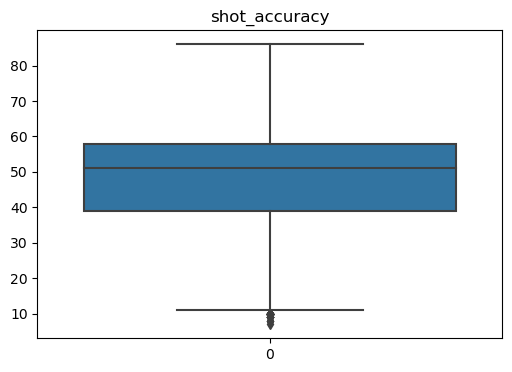

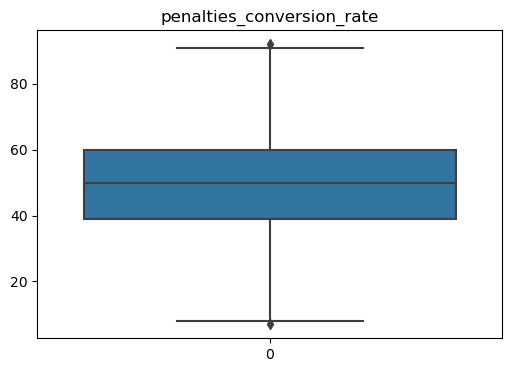

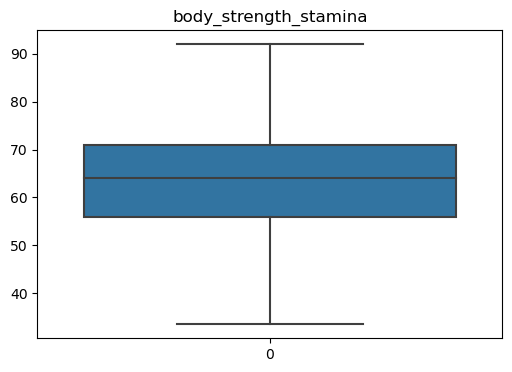

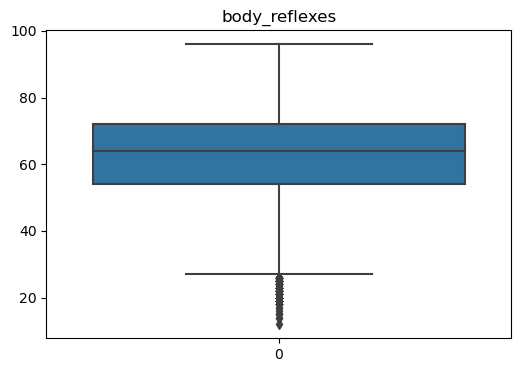

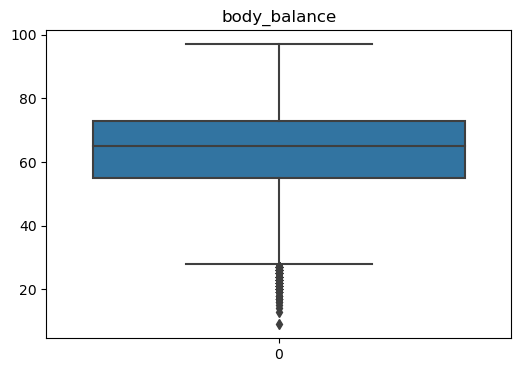

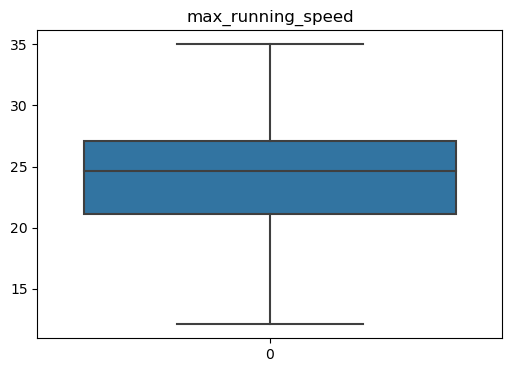

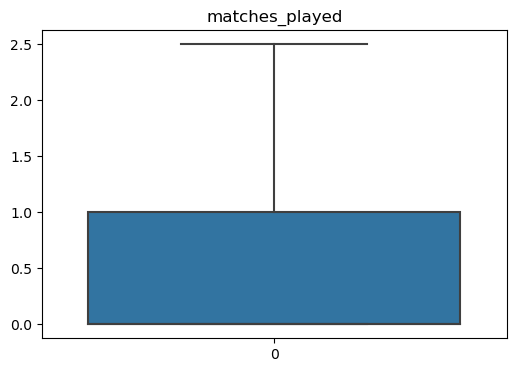

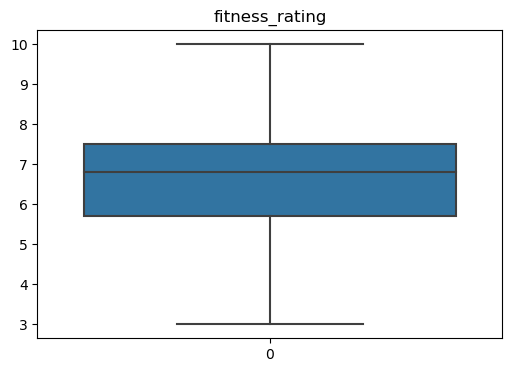

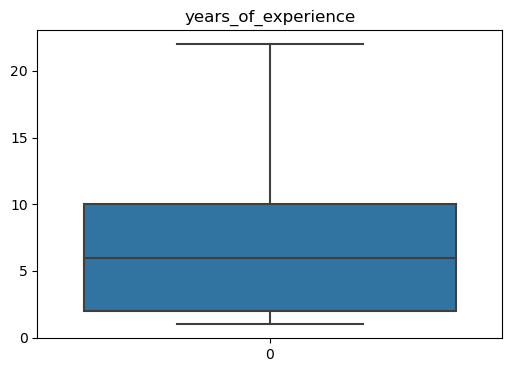

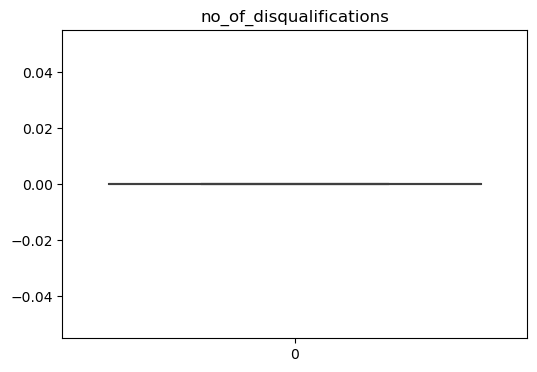

In [42]:
outlier_columns=['age','weight','ball_controlling_skills','mental_strength','goalkeeping_skills',
                 'passing_skills','dribbling_skills','jumping_skills','shot_accuracy','penalties_conversion_rate','body_strength_stamina','body_reflexes','body_balance','max_running_speed','matches_played','fitness_rating','years_of_experience','no_of_disqualifications']
for i in outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

***Outliers are present in upper and lower whiskers.***

### check the skewness of the distribution

In [43]:
for i in outlier_columns:
    print('Skewness of feature',i,':',data[i].skew())

Skewness of feature age : 0.7140818758757769
Skewness of feature weight : 0.22299994435867296
Skewness of feature ball_controlling_skills : -0.7678949704656196
Skewness of feature mental_strength : -0.3792035822240313
Skewness of feature goalkeeping_skills : 0.5114422837728415
Skewness of feature passing_skills : -0.6177616625633234
Skewness of feature dribbling_skills : -0.8586466331999042
Skewness of feature jumping_skills : -0.4258703977997408
Skewness of feature shot_accuracy : -0.7165638101432749
Skewness of feature penalties_conversion_rate : -0.37409345654919507
Skewness of feature body_strength_stamina : -0.5420562252874312
Skewness of feature body_reflexes : -0.5750905832950571
Skewness of feature body_balance : -0.6034255669708425
Skewness of feature max_running_speed : -0.6466417098799458
Skewness of feature matches_played : 1.8071519914281962
Skewness of feature fitness_rating : -0.7177969060278918
Skewness of feature years_of_experience : 0.6687329302138937
Skewness of fea

***almost every features are skewed both positively and neagtively.***

In [44]:
# Assuming data is your DataFrame and outlier_columns is the list of columns to check for outliers
for i in outlier_columns:    
    Q1 = np.percentile(data[i], 25, interpolation='midpoint')
    Q3 = np.percentile(data[i], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    outliers = []

    for j in data[i]:
        if j < low_lim or j > up_lim:
            outliers.append(j)
    
    # Use the clip method to cap the outliers
    data[i] = data[i].clip(lower=low_lim, upper=up_lim)

print("Outliers have been capped.")


Outliers have been capped.


### Check again for outliers

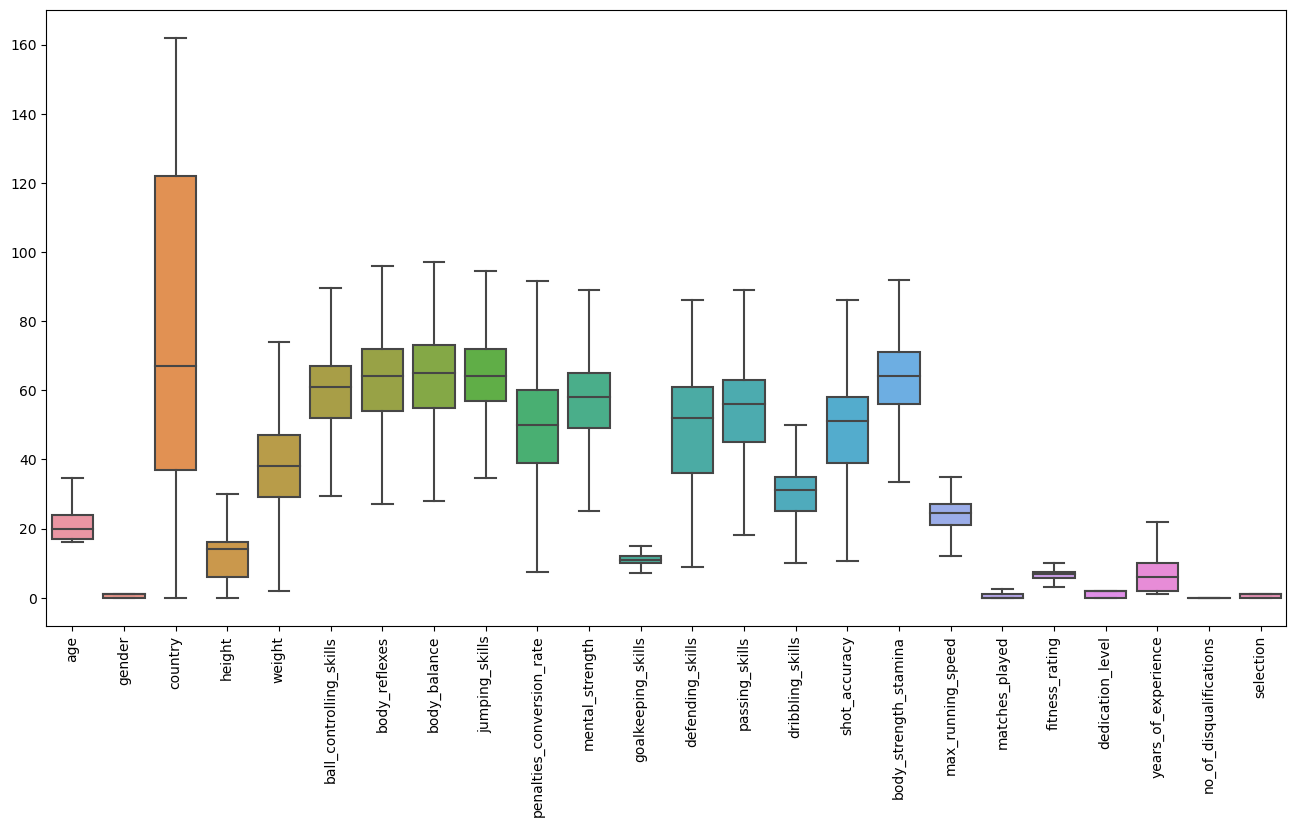

In [45]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(data)
plt.show()

***All outliers are treated properly.***

### Seperating the target (y) and independent variables (x)

In [46]:
x=data.drop('selection',axis=1)
y=data['selection'].values.reshape(-1,1)

### standard scaling the data

In [47]:
sc=StandardScaler()
x=sc.fit_transform(x)

### train test split

take the test size as 0.2

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Modeling

## Logistic Regression

In [51]:
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)
print('Accuracy of Logistic Regression Model', accuracy_score(y_test,log_reg_pred))
print('Precision of Logistic Regression Model', precision_score(y_test,log_reg_pred,average='weighted'))
print('Recall of Logistic Regression Model:',recall_score(y_test,log_reg_pred,average='weighted'))
print('F1 score of Logistic Regression Model', f1_score(y_test,log_reg_pred,average='weighted'))

Accuracy of Logistic Regression Model 0.729903536977492
Precision of Logistic Regression Model 0.7305663115909655
Recall of Logistic Regression Model: 0.729903536977492
F1 score of Logistic Regression Model 0.7276091797921004


# KNN

## To choose the k value

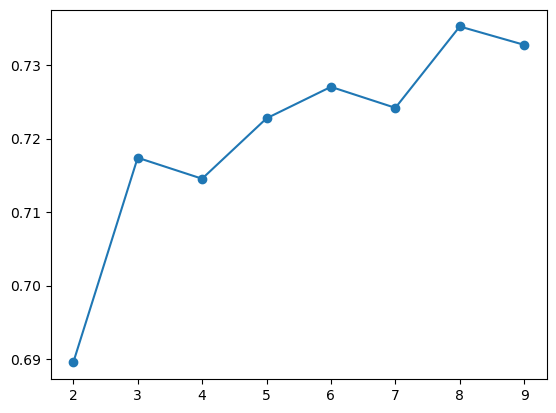

In [54]:
metric_k=[]
neighbors=np.arange(2,10)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    knn_pred=classifier.predict(x_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')   
plt.show()

***high accuracy got at 8 so take k as 8***

In [56]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='euclidean')
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)
print('Accuracy of KNN Classifier', accuracy_score(y_test,knn_pred))
print('Precision of KNN Classifier', precision_score(y_test,knn_pred,average='weighted'))
print('Recall of KNN Classifier:',recall_score(y_test,knn_pred,average='weighted'))
print('F1 score of KNN Classifier', f1_score(y_test,knn_pred,average='weighted'))

Accuracy of KNN Classifier 0.7352625937834941
Precision of KNN Classifier 0.7379589568912631
Recall of KNN Classifier: 0.7352625937834941
F1 score of KNN Classifier 0.7356916990683222


# Decision Tree

In [60]:
dt_clf=DecisionTreeClassifier(max_depth=50,criterion='entropy',min_samples_leaf=5)
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_test)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_test,dt_pred))
print('Precision of Decision Tree Classifier', precision_score(y_test,dt_pred,average='weighted'))
print('Recall of Decision Tree Classifier:',recall_score(y_test,dt_pred,average='weighted'))

Accuracy of Decision Tree Classifier 0.7720614505180422
Precision of Decision Tree Classifier 0.7717625401121999
Recall of Decision Tree Classifier: 0.7720614505180422


# Random Forest

In [58]:
rf_clf=RandomForestClassifier(criterion='gini',min_samples_split=3,min_samples_leaf=5,max_features='sqrt')
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)
print('Accuracy of Random Forest Classifier', accuracy_score(y_test,rf_pred))
print('Precision of Random Forest Classifier', precision_score(y_test,rf_pred,average='weighted'))
print('Recall of Random Forest Classifier:',recall_score(y_test,rf_pred,average='weighted'))
print('F1 score of Random Forest Classifier', f1_score(y_test,rf_pred,average='weighted'))

Accuracy of Random Forest Classifier 0.8302965344765988
Precision of Random Forest Classifier 0.8303471103235802
Recall of Random Forest Classifier: 0.8302965344765988
F1 score of Random Forest Classifier 0.8298964877796882


# SVM

In [61]:
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)
svm_pred=sv_clf.predict(x_test)
print('Accuracy of SVM Classifier', accuracy_score(y_test,svm_pred))
print('Precision of SVM Classifier', precision_score(y_test,svm_pred,average='weighted'))
print('Recall of SVM Classifier:',recall_score(y_test,svm_pred,average='weighted'))
print('F1 score of SVM Classifier', f1_score(y_test,svm_pred,average='weighted'))

Accuracy of SVM Classifier 0.7316898892461593
Precision of SVM Classifier 0.731854806810383
Recall of SVM Classifier: 0.7316898892461593
F1 score of SVM Classifier 0.7298815873085389


# Comparison between different Classification Models

In [62]:
mux = pd.MultiIndex.from_product([['Logistic Regression','KNN','SVM','Decision Tree','Random Forest']])
Metric=['Accuracy','Precision','Recall','F1 score']
comp_table = pd.DataFrame([[accuracy_score(y_test,log_reg_pred),accuracy_score(y_test,knn_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,dt_pred),accuracy_score(y_test,rf_pred)],[precision_score(y_test,log_reg_pred,average='weighted'),precision_score(y_test,knn_pred,average='weighted'),precision_score(y_test,svm_pred,average='weighted'),precision_score(y_test,dt_pred,average='weighted'),precision_score(y_test,rf_pred,average='weighted')],[recall_score(y_test,log_reg_pred,average='weighted'),recall_score(y_test,knn_pred,average='weighted'),recall_score(y_test,svm_pred,average='weighted'),recall_score(y_test,dt_pred,average='weighted'),recall_score(y_test,rf_pred,average='weighted')],[f1_score(y_test,log_reg_pred,average='weighted'),f1_score(y_test,knn_pred,average='weighted'),f1_score(y_test,svm_pred,average='weighted'),f1_score(y_test,dt_pred,average='weighted'),f1_score(y_test,rf_pred,average='weighted')]], columns=mux)
comp_table.index=Metric
comp_table

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest
Accuracy,0.729904,0.735263,0.731690,0.772061,0.830297
Precision,0.730566,0.737959,0.731855,0.771763,0.830347
Recall,0.729904,0.735263,0.731690,0.772061,0.830297
F1 score,0.727609,0.735692,0.729882,0.771784,0.829896


***here we can see randomforest gives us the best result***

# Prediction

In [63]:
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

# Evaluation metrix

In [64]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)]],columns=['Random Forest'])
table.index=metric
table

,Random Forest
Train Accuracy,0.948191
Test Accuracy,0.831726
Precision,0.832695
Recall,0.861864
F1 Score,0.847028


***Infernce:here there is not much difference between the test_accuracy and the train_accuracy,if we have to improve the accuracy we can do fine tuning***

# parameter Tuning

In [65]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [66]:
CV_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

## Prediction with best parameters

In [67]:
rf_clf1=RandomForestClassifier(n_estimators=200,max_depth=7,criterion='gini',max_features='log2')
rf_clf1.fit(x_train,y_train)
rf_pred1=rf_clf.predict(x_test)

# Evaluation Metrix

In [69]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf1.score(x_train,y_train)],[accuracy_score(y_test,rf_pred1)],[precision_score(y_test,rf_pred1)],[recall_score(y_test,rf_pred1)],[f1_score(y_test,rf_pred1)]],columns=['Random Forest with Best Parameters'])
table.index=metric
table

,Random Forest with Best Parameters
Train Accuracy,0.834837
Test Accuracy,0.831726
Precision,0.832695
Recall,0.861864
F1 Score,0.847028


***Now train accuracy got reduced and there is no much difference between train and test accuracy. So model performs well on unseen data.***

### Confusion Matrix and Classification Report

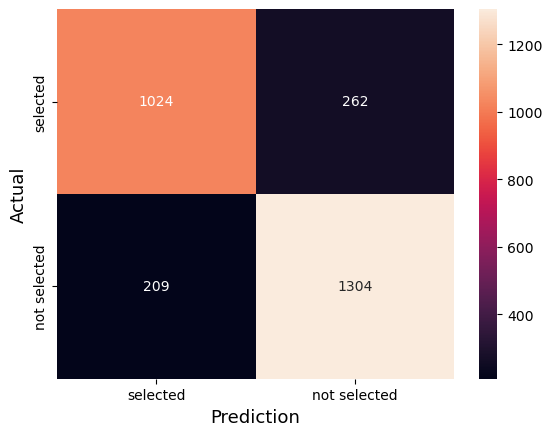

In [94]:
cm = confusion_matrix(y_test,rf_pred1)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['selected','not selected'],
            yticklabels=['selected','not selected'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.show()

In [75]:
print(classification_report(y_test,rf_pred1))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1286
           1       0.83      0.86      0.85      1513

    accuracy                           0.83      2799
   macro avg       0.83      0.83      0.83      2799
weighted avg       0.83      0.83      0.83      2799



# The metrix values are good , so the model is satisfactory